In [1]:
import numpy as np
import pandas as pd
from glob import glob
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
mask_paths = glob("/home/mykang/mmsegmentation/data/Satellite/ann_dir/val_slice/*.png")
masks = [cv2.imread(mask, cv2.IMREAD_GRAYSCALE) for mask in tqdm(mask_paths)]
mask_data = np.array(masks)

100%|██████████| 17136/17136 [00:14<00:00, 1206.35it/s]


In [3]:
def remove_small_segments(mask):
    connectivity = 4  # 4-way connectivity
    _, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity)
    segment_areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude the background component (index 0)

    return segment_areas


In [5]:

segment_areas = []
for mask in tqdm(masks):
    segment_areas.extend(remove_small_segments(mask))

100%|██████████| 17136/17136 [00:15<00:00, 1071.71it/s]


In [6]:
len(segment_areas), max(segment_areas), min(segment_areas)

(120823, 65393, 1)

In [6]:
histogram, bins = np.histogram(segment_areas, bins=range(1, np.max(segment_areas)+2))

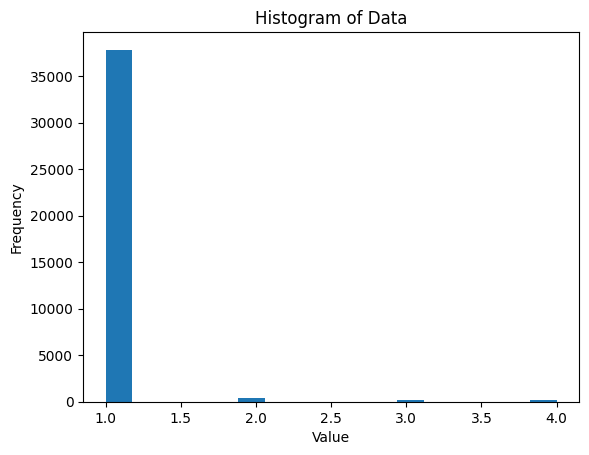

In [9]:
segment_areas_sub = [segment for segment in segment_areas if segment < 5]
plt.hist(segment_areas_sub, bins='auto')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()